# 얼굴이미지 추출

> - 일단 다음과 같은 방식으로 한장에 대해 테스트를 진행
> - 이를 활용하여 다량의 사진을 변환 시킨다.

In [ ]:
# !pip install opencv-python
# !pip install matplotlib

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

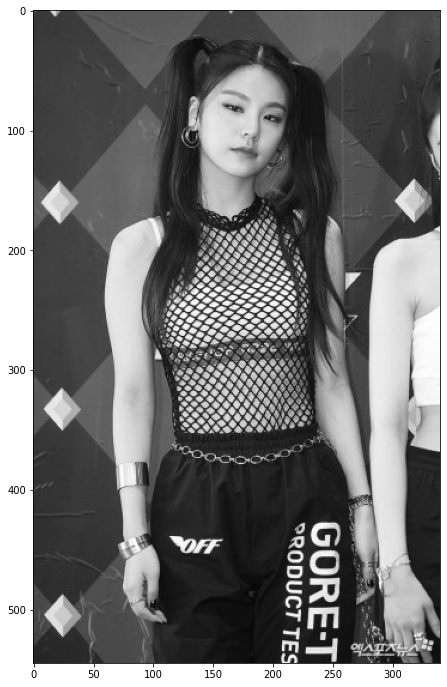

In [11]:
# 이미지 불러오기
image = cv2.imread('./test_Yezi_0.jpg')

# ori_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(ori_image)

# 흑백이미지 만들기
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 흑백이미지 그리기
plt.figure(figsize=(12,12))
plt.imshow(grayImage, cmap='gray')


# plt.xticks([]), plt.yticks([]) # x, y 축 숨기기
plt.show()

> 실제크기 : 340*545

In [12]:
#  직접 다운받았음 / https://github.com/opencv/opencv/tree/master/data/haarcascades -> 안됨
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')`

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [13]:
faces = face_cascade.detectMultiScale(grayImage, 1.03, 5)
eyes = eye_cascade.detectMultiScale(grayImage, 1.03, 5)
print(faces.shape)
print("얼굴 개수: " + str(faces.shape[0]))

(3, 4)
얼굴 개수: 3


In [14]:
# x,y,w,h 순서로 x,y의 기준점은 좌상단이다.
print(faces)
print(eyes)

[[138 119  54  54]
 [135  49  91  91]
 [ 81  79  30  30]]
[[229 425  25  25]
 [153  67  27  27]
 [186  79  23  23]]


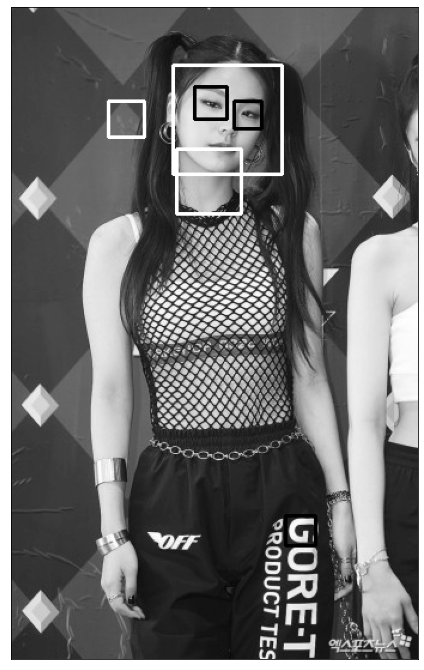

In [15]:
for (x,y,w,h) in faces:
    # 마지막 매개변수는 선의 굵기 / -1은 영역을 채움
    # 지우진 못한다... RGB값을 없앤다고 생각하면됨
    cv2.rectangle(grayImage,(x,y),(x+w,y+h),(255,0,0),2)
    
for (x,y,w,h) in eyes:
    # 마지막 매개변수는 선의 굵기 / -1은 영역을 채움
    # 지우진 못한다... RGB값을 없앤다고 생각하면됨
    # 사각형을 그릴 이미지, 사각형의 좌측상단좌표, 우측하단좌표, 테두리 색, 테두리 두께
    cv2.rectangle(grayImage,(x,y),(x+w,y+h),(0, 0, 0),2)
plt.figure(figsize=(12,12))
plt.imshow(grayImage, cmap='gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

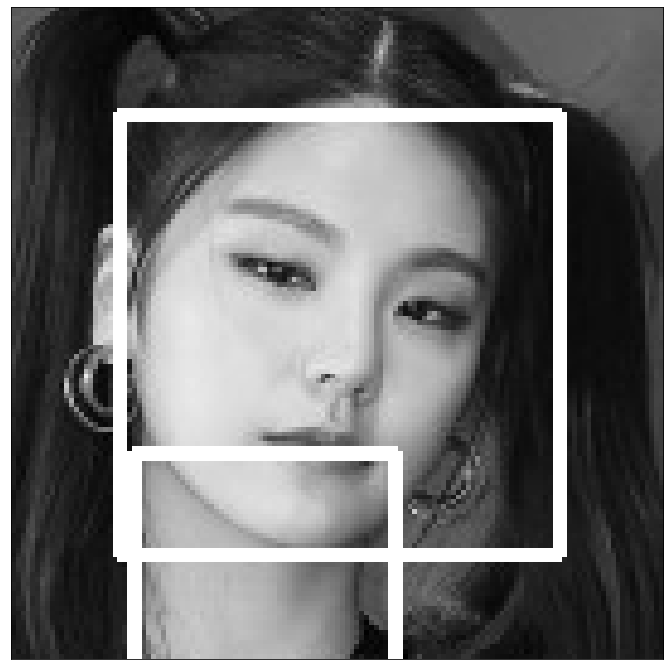

In [33]:
max_w= 0
real_face = [0,0,0,0]
# 나는 진짜얼굴은 가장 크게 잡힐 것이라는 생각에 크기가 가장 큰 얼굴을 추출했음
for (x,y,w,h) in faces:
    if w > max_w:
        max_w = w
        real_face = [[x,y,w,h]]

for x,y,w,h in real_face:
    cv2.rectangle(grayImage,(x,y),(x+w,y+h),(255,0,0),2)
    cropped = grayImage[y - int(h/4):y + h + int(h/4), x - int(w/4):x + w + int(w/4)]
plt.figure(figsize=(12,12))
plt.imshow(cropped, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [34]:
cv2.imwrite('test_cropped.jpg', cropped)

True